In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Data.Data import data_cov,data_init

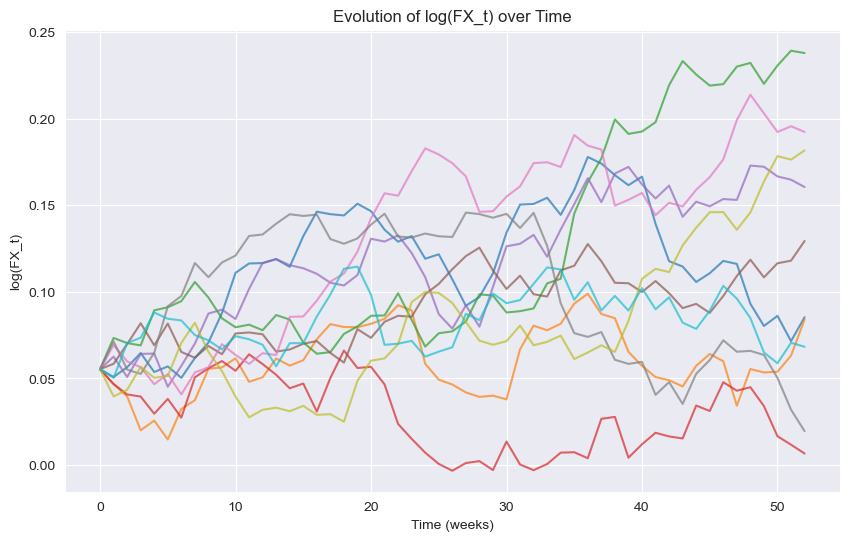

In [2]:
# Load data from the provided files
covariance_matrix = data_cov
init_values = data_init

# Simulation parameters
time_horizon = 52  # Weekly steps (1 year)
delta_t = 1 / 52   # Time step (1 week)
mean_vector = np.array([0.07 * delta_t, 0.06 * delta_t] + [0] * (len(covariance_matrix) - 2))  # μ
cov_matrix = covariance_matrix.to_numpy()  # Σ
num_simulations = 10000  # Number of paths

# Initial values
x0 = init_values["initial values"].to_numpy()

# Simulating X_t evolution
np.random.seed(42)  # For reproducibility
simulations = np.zeros((time_horizon + 1, len(x0), num_simulations))
simulations[0] = x0[:, None]  # Set initial values

for t in range(1, time_horizon + 1):
    # Generate random shocks
    shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations).T
    # Update simulations for time t
    simulations[t] = simulations[t - 1] + shocks

# Extract log FX evolution
log_fx_simulations = simulations[:, 0, :]  # log(FX_t) is the first variable

# Visualize the evolution of log(FX_t)
plt.figure(figsize=(10, 6))
for i in range(min(10, num_simulations)):  # Plot first 10 paths
    plt.plot(range(time_horizon + 1), log_fx_simulations[:, i], alpha=0.7)
plt.title("Evolution of log(FX_t) over Time")
plt.xlabel("Time (weeks)")
plt.ylabel("log(FX_t)")
plt.grid(True)
plt.show()

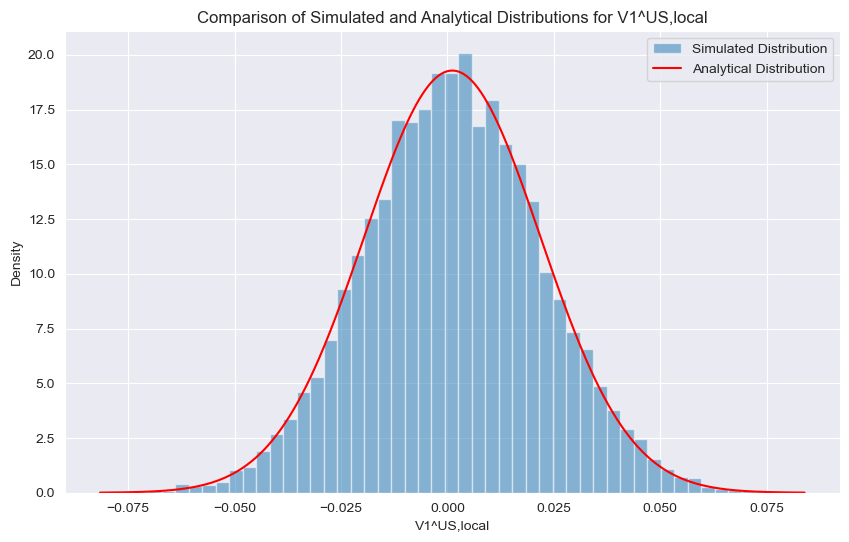

In [3]:
# Parameters and simulation setup
v_us_index = 1  # Assuming V1^US,local is the second variable in the covariance matrix
time_horizon = 1  # One time step (week)
num_simulations = 10000  # Number of simulations
mean_vector = np.array([0.07 * delta_t, 0.06 * delta_t] + [0] * (len(covariance_matrix) - 2))  # μ
cov_matrix = covariance_matrix.to_numpy()  # Covariance matrix
x0 = init_values["initial values"].to_numpy()  # Initial values

# Simulate the distribution of V1^US,local
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)
simulated_v1_us_local = x0[v_us_index] + simulated_shocks[:, v_us_index]

# Analytical distribution of V1^US,local
mean_v1_us_local = x0[v_us_index] + mean_vector[v_us_index]
std_v1_us_local = np.sqrt(cov_matrix[v_us_index, v_us_index])

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))

# Simulated distribution
plt.hist(simulated_v1_us_local, bins=50, alpha=0.5, label="Simulated Distribution", density=True)

# Analytical normal distribution
x = np.linspace(mean_v1_us_local - 4 * std_v1_us_local, mean_v1_us_local + 4 * std_v1_us_local, 500)
pdf = (1 / (std_v1_us_local * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_v1_us_local) / std_v1_us_local) ** 2)
plt.plot(x, pdf, label="Analytical Distribution", color='red')

# Labels and legend
plt.title("Comparison of Simulated and Analytical Distributions for V1^US,local")
plt.xlabel("V1^US,local")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

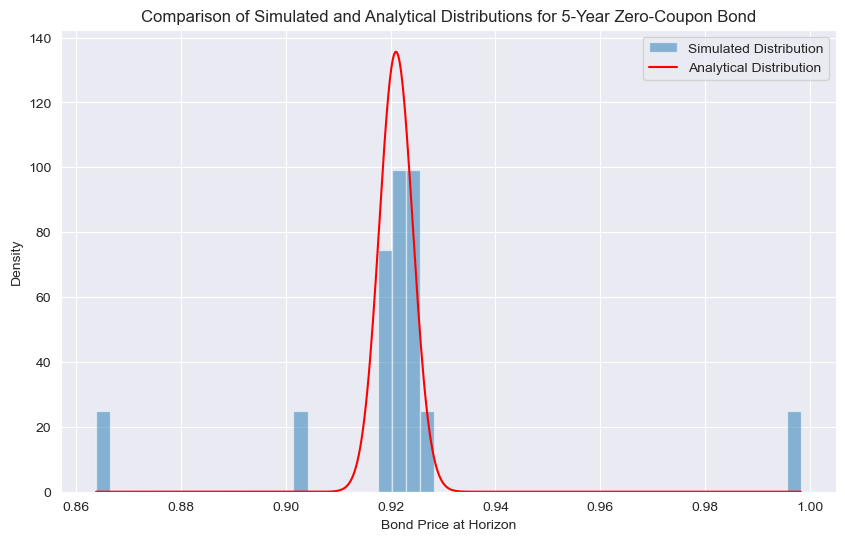

In [9]:
# Parameters
time_to_maturity = 5  # Initial maturity (years)
reduced_maturity = time_to_maturity - 1  # Maturity at horizon (4 years)
bond_index = 7  # Assuming the 5-year EUR yield is the 6th variable in the covariance matrix
num_simulations = 1000  # Number of simulations

# Initial 5-year yield
initial_yield = x0[bond_index]  # Extract initial yield from x0

# Initial bond price
initial_bond_price = np.exp(-initial_yield * time_to_maturity)

# Simulate yields at horizon
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)
simulated_yield_horizon = x0[bond_index] + simulated_shocks[bond_index, :]

# Simulated bond prices at horizon
simulated_bond_prices = np.exp(-simulated_yield_horizon * reduced_maturity)

# Analytical distribution of bond prices
mean_yield_horizon = x0[bond_index] + mean_vector[bond_index]
std_yield_horizon = np.sqrt(cov_matrix[bond_index, bond_index])
mean_log_price = -mean_yield_horizon * reduced_maturity
std_log_price = reduced_maturity * std_yield_horizon
mean_price = np.exp(mean_log_price + 0.5 * std_log_price**2)
std_price = np.sqrt((np.exp(std_log_price**2) - 1) * np.exp(2 * mean_log_price + std_log_price**2))

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))

# Simulated distribution
plt.hist(simulated_bond_prices, bins=50, alpha=0.5, label="Simulated Distribution", density=True)

# Analytical log-normal distribution
x = np.linspace(min(simulated_bond_prices), max(simulated_bond_prices), 500)
lognorm_pdf = (1 / (x * std_price * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mean_log_price) / std_log_price) ** 2)
plt.plot(x, lognorm_pdf, label="Analytical Distribution", color='red')

# Labels and legend
plt.title("Comparison of Simulated and Analytical Distributions for 5-Year Zero-Coupon Bond")
plt.xlabel("Bond Price at Horizon")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import pandas as pd

# Parameters
num_simulations = 1000  # Number of simulations
time_horizon = 1  # Horizon for joint distribution (1 year)
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US,local
v_eur_index = 2  # Index for V^EUR
y_us_4y_index = 6  # Index for 4-year USD yield
y_eur_4y_index = 11  # Index for 4-year EUR yield

# Initial values
initial_values = x0  # Already loaded
tau = 4  # Time to maturity for 4-year bonds

# Simulate the joint distribution
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Compute the components of P_1
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_4y = initial_values[y_us_4y_index] + simulated_shocks[:, y_us_4y_index]
simulated_y_eur_4y = initial_values[y_eur_4y_index] + simulated_shocks[:, y_eur_4y_index]

# Calculate bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_4y * tau)
simulated_z_eur_4y = np.exp(-simulated_y_eur_4y * tau)

# Combine into joint distribution P_1
joint_distribution = np.vstack((simulated_fx, simulated_v_us, simulated_v_eur, simulated_z_us_4y, simulated_z_eur_4y)).T

# Convert to DataFrame for easier analysis
columns = ["FX_1", "V_US_1_local", "V_EUR_1", "Z_US_4Y_local", "Z_EUR_4Y"]
joint_distribution_df = pd.DataFrame(joint_distribution, columns=columns)

# Display summary statistics
print(joint_distribution_df.describe())


              FX_1  V_US_1_local      V_EUR_1  Z_US_4Y_local     Z_EUR_4Y
count  1000.000000   1000.000000  1000.000000    1000.000000  1000.000000
mean      0.056596      0.001464     0.000442       0.922979     0.858288
std       0.010803      0.021526     0.022045       0.003071     0.003556
min       0.021322     -0.078302    -0.074756       0.913935     0.848017
25%       0.049647     -0.013878    -0.015612       0.920763     0.855911
50%       0.056655      0.002150     0.000820       0.922966     0.858191
75%       0.063455      0.015427     0.015415       0.925031     0.860731
max       0.091400      0.072690     0.066410       0.932422     0.869543


            1/FX_1  V_1^US (EUR)      V_1^EUR  Z_1^USD 4Y (EUR)   Z_1^EUR 4Y
count  1000.000000   1000.000000  1000.000000       1000.000000  1000.000000
mean      0.945031      0.001341     0.000442          0.872242     0.858288
std       0.010215      0.020343     0.022045          0.009739     0.003556
min       0.912652     -0.076416    -0.074756          0.844767     0.848017
25%       0.938517     -0.013212    -0.015612          0.866174     0.855911
50%       0.944920      0.002023     0.000820          0.872202     0.858191
75%       0.951565      0.014594     0.015415          0.878684     0.860731
max       0.978903      0.068491     0.066410          0.907355     0.869543


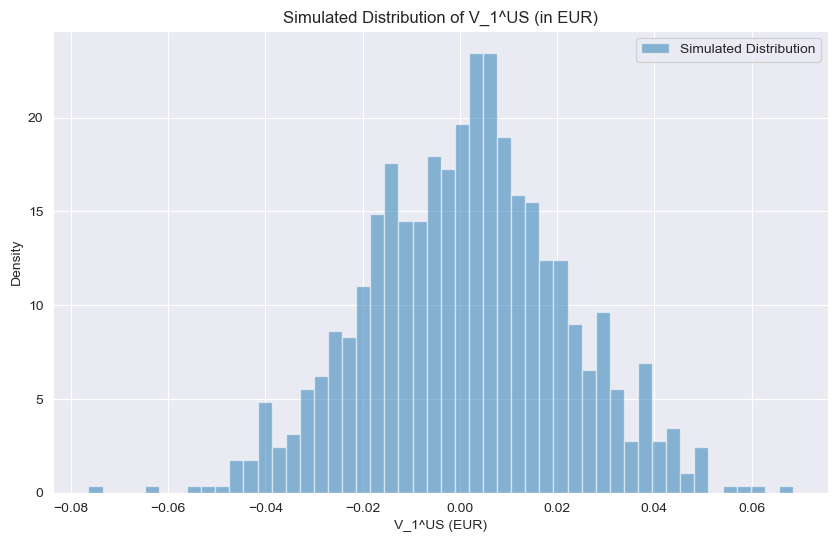

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
num_simulations = 1000  # Number of simulations
tau = 4  # Time to maturity for 4-year bonds
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US
v_eur_index = 2  # Index for V^EUR
y_us_4y_index = 6  # Index for 4-year USD yield
y_eur_4y_index = 11  # Index for 4-year EUR yield

# Simulate market invariants
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Simulated components
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_4y = initial_values[y_us_4y_index] + simulated_shocks[:, y_us_4y_index]
simulated_y_eur_4y = initial_values[y_eur_4y_index] + simulated_shocks[:, y_eur_4y_index]

# Convert yields to bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_4y * tau)
simulated_z_eur_4y = np.exp(-simulated_y_eur_4y * tau)

# Convert USD values to EUR
simulated_fx_inverse = 1 / np.exp(simulated_fx)  # 1 / FX_1
simulated_v_us_eur = simulated_v_us * simulated_fx_inverse  # V_1^US / FX_1
simulated_z_us_4y_eur = simulated_z_us_4y * simulated_fx_inverse  # Z_1^USD / FX_1

# Combine into joint distribution P_1^EUR
joint_distribution_eur = np.vstack((
    simulated_fx_inverse,
    simulated_v_us_eur,
    simulated_v_eur,
    simulated_z_us_4y_eur,
    simulated_z_eur_4y
)).T

# Convert to DataFrame for easier analysis
columns = ["1/FX_1", "V_1^US (EUR)", "V_1^EUR", "Z_1^USD 4Y (EUR)", "Z_1^EUR 4Y"]
joint_distribution_eur_df = pd.DataFrame(joint_distribution_eur, columns=columns)

# Summary statistics
print(joint_distribution_eur_df.describe())

# Visualize one component (e.g., V_1^US (EUR))
plt.figure(figsize=(10, 6))
plt.hist(joint_distribution_eur_df["V_1^US (EUR)"], bins=50, alpha=0.5, label="Simulated Distribution", density=True)
plt.title("Simulated Distribution of V_1^US (in EUR)")
plt.xlabel("V_1^US (EUR)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np

# Parameters
num_simulations = 1000  # Number of simulations
tau_us = 4  # Time to maturity for USD bond
tau_us_initial = 5  # Initial maturity for USD bond
tau_eur = 4  # Time to maturity for EUR bond
tau_eur_initial = 5  # Initial maturity for EUR bond
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US
v_eur_index = 2  # Index for V^EUR
y_us_1_index = 6  # Index for 1-year USD yield
y_eur_1_index = 11  # Index for 1-year EUR yield

# Simulate market invariants
np.random.seed(42)
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Simulated components
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_1 = initial_values[y_us_1_index] + simulated_shocks[:, y_us_1_index]
simulated_y_eur_1 = initial_values[y_eur_1_index] + simulated_shocks[:, y_eur_1_index]

# Bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_1 * tau_us)
simulated_z_eur_4y = np.exp(-simulated_y_eur_1 * tau_eur)
initial_z_us_5y = np.exp(-initial_values[y_us_1_index] * tau_us_initial)
initial_z_eur_5y = np.exp(-initial_values[y_eur_1_index] * tau_eur_initial)

# FX Forward Price
f0 = np.exp(simulated_fx) * np.exp(initial_values[y_us_1_index] - initial_values[y_eur_1_index])

# PnL components
pnl_fx = 1 / f0 - 1 / np.exp(simulated_fx)
pnl_v_us = simulated_v_us - initial_values[v_us_index]
pnl_v_eur = simulated_v_eur - initial_values[v_eur_index]
pnl_z_us = simulated_z_us_4y - initial_z_us_5y
pnl_z_eur = simulated_z_eur_4y - initial_z_eur_5y

# Combine into PnL vector
pnl_vector = np.vstack((pnl_fx, pnl_v_us, pnl_v_eur, pnl_z_us, pnl_z_eur)).T

# Expectation and covariance of PnL vector
pnl_mean = np.mean(pnl_vector, axis=0)
pnl_covariance = np.cov(pnl_vector, rowvar=False)

# Portfolio PnL
h = np.array([0.2, 0.3, 0.3, 0.1, 0.1])  # Example holding vector
portfolio_pnl = pnl_vector @ h

# Expectation and variance of portfolio PnL
portfolio_pnl_mean = np.mean(portfolio_pnl)
portfolio_pnl_variance = np.var(portfolio_pnl)

# Summary
print("PnL Vector Mean:\n", pnl_mean)
print("PnL Vector Covariance:\n", pnl_covariance)
print("Portfolio PnL Mean:", portfolio_pnl_mean)
print("Portfolio PnL Variance:", portfolio_pnl_variance)


PnL Vector Mean:
 [0.01731776 0.00146369 0.00044173 0.01835567 0.03218226]
PnL Vector Covariance:
 [[ 3.50370398e-08 -7.78360087e-07  9.84836874e-08 -2.52556742e-08
  -1.93801164e-07]
 [-7.78360087e-07  4.63371063e-04  3.66659955e-04  7.53339809e-06
  -1.16743398e-05]
 [ 9.84836874e-08  3.66659955e-04  4.85968148e-04  3.31847963e-06
  -1.49809261e-05]
 [-2.52556742e-08  7.53339809e-06  3.31847963e-06  9.43028322e-06
   7.37680929e-06]
 [-1.93801164e-07 -1.16743398e-05 -1.49809261e-05  7.37680929e-06
   1.26422712e-05]]
Portfolio PnL Mean: 0.00908897255158783
Portfolio PnL Variance: 0.0001506196628647507
